In [2]:
import ast
import pandas as pd
import seaborn as sb
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Ayush\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Sat Oct 26 00:39:13 2024).


In [3]:
df_ind=df[(df['job_country']=='India')].dropna(subset=['salary_year_avg'])
titles=df_ind['job_title_short'].value_counts().index[:6].tolist()
df_ind=df_ind[df_ind['job_title_short'].isin(titles)]
ind=df_ind.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index



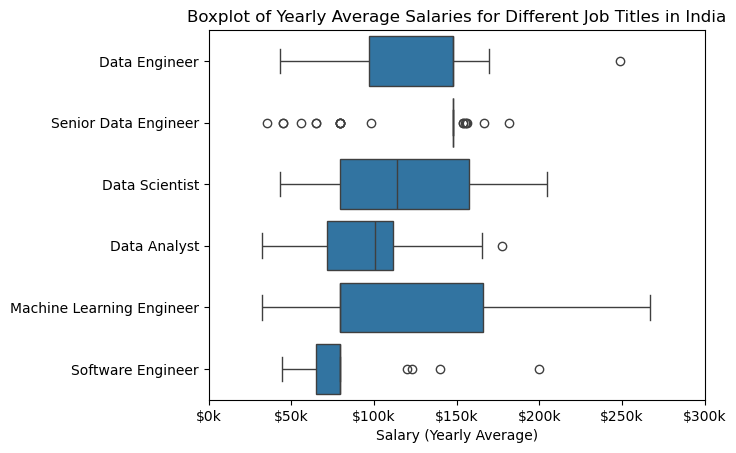

In [ ]:
sb.boxplot(data=df_ind,x='salary_year_avg',y='job_title_short',order=ind)
plt.xlabel('Salary (Yearly Average)')
plt.ylabel('')
plt.title('Boxplot of Yearly Average Salaries for Different Job Titles in India')
ax=plt.gca()
plt.xlim(0,300000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}k'))
plt.show()